<h1><center>Laboratorio 9:  ¿Superhéroe o Villano?  🦴</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Martín Sepúlveda
- Nombre de alumno 2: Maximiliano Varas


### **Link de repositorio de GitHub:** [Enlace](https://github.com/mvarasg/labs-sepulveda-varas)

## Temas a tratar

- Codificación de texto usando Bag of Words.
- Búsqueda del modelo óptimo de clasificación usando `GridSearch`
- Uso de pipelines.

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer material del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Obtener caracteristicas a partir de texto usando `CountVectorizer`.
- Fijar un pipeline con un modelo base que luego se irá optimizando.
- Comprender como realizar una búsqueda de grilla sobre un conjunto de clasificadores e hiperparámetros usando `GridSearch`.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

#Importamos librerias utiles 😸

In [39]:
# Librería Core del lab.
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer

# Clasifación
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score


import sys
# Librería para plotear
#!{sys.executable} -m pip install --upgrade plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Proyecciones en baja dimensionalidad: UMAP
#!{sys.executable} -m pip install umap-learn


# Librería para NLP
#!{sys.executable} -m pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize  
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mvarasg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mvarasg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 1. ¿Quien es Bat Cow?

<p align="center">
  <img src="https://i.imgur.com/D9f1RHy.jpg" width="350">
</p>

En vez de estar desarrollando las evaluaciones correspondientes a su curso, su profesor de catedra y su auxiliar discuten acerca la alineación (héroe o villano) del personaje de ficción Bat-Cow. 

El cuerpo docente, no logra ponerse de acuerdo si el personaje es bueno, neutral o malo: el auxiliar plantea que Bat-cow posee una siniestra mirada, intrigante pero común característica de los personajes malvados. 
Por otra parte, extendiendo las ideas de Rousseau, el profesor plantea que tal como los humanos no nacen malos, no existe motivo por el cual una vaca con superpoderes deba serlo.

Sin embargo, ambos concuerdan que es difícil estimar la alineación solo usando los atributos físicos, por lo que creen el análisis debe ser complementado aún más antes de comunicarle los resultados a su estudiantado. Buscando más información, ambos sujetos se percatan de la existencia de un excelente antecedente para estimar la alineación: la historia personal de cada superhéroe o villano.

Es por esto le solicitan que construya y optimice un clasificador basado en texto el cual analice la alineación de cada personaje basado en su historia personal.

Para este laboratorio deben trabajar con los datos `df_comics.csv` y `comics_no_label.csv` subidos a u-cursos. El primero es un conjunto de datos que les servirá para entrenar un modelo de clasificación, mientras que el segundo es un dataset con personajes de ficción no etiquetados a predecir (sí, aquí está la misteriosa Batcow).

Para comenzar cargue los dataset señalados y visualice a través de un head los atributos que poseen cada uno de los dataset.


In [40]:
# Si usted está utilizando Colaboratory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


In [41]:
df_comics = pd.read_csv('df_comics.csv')
df_comics_no_label = pd.read_csv('comics_no_label.csv')
df_comics = df_comics.dropna(subset=['history_text']) # eliminar ejemplos sin historia

In [42]:
# queda a labor de su equipo hacer el análisis exploratorio
df_comics.head()

,Unnamed: 0,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Aayla Secura,Aayla Secura,NaN,8,ayla Secura was a Rutian Twi'lek Jedi Knight (...,NaN,90,40,45,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
df_comics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1285 entries, 0 to 1366
Data columns (total 82 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        1285 non-null   int64  
 1   name                              1285 non-null   object 
 2   real_name                         1164 non-null   object 
 3   full_name                         894 non-null    object 
 4   overall_score                     1285 non-null   object 
 5   history_text                      1285 non-null   object 
 6   powers_text                       959 non-null    object 
 7   intelligence_score                1285 non-null   int64  
 8   strength_score                    1285 non-null   int64  
 9   speed_score                       1285 non-null   int64  
 10  durability_score                  1285 non-null   int64  
 11  power_score                       1285 non-null   int64  
 12  combat_scor

## 1.1 Obtención de Features y Bag of Words

<p align="center">
  <img src="https://media0.giphy.com/media/eIUpSyzwGp0YhAMTKr/200.gif" width="300">
</p>

Primero que todo, deben obtener un vector de características del atributo `history_text`, utilizando `Bag of Words`. En este atributo se presenta una breve descripción de la historia de cada uno de los personajes de ficción presentes en el dataset. 

Pero... antes de empezar, ¿Que es `Bag of Words`?...

`Bag of Words` es un modelo de conteo utilizado en Procesamiento de Lenguaje Natural (NLP) que tiene como objetivo generar una representación vectorial (vector de características en nuestro caso) para cada documento a través del conteo de las palabras que contienen. 

La siguiente figura muestra un ejemplo de `Bag of Words` en acción:

<p align="center">
  <img src="https://user.oc-static.com/upload/2020/10/23/16034397439042_surfin%20bird%20bow.png" width="500">
</p>

Como pueden ver, el modelo de `Bag of Words` no resulta tan complicado, ¿pero cómo lo aplicamos en python?. 

Como podrán darse cuenta del ejemplo anterior, para facilitar el conteo será necesario transformar cada uno de los documentos en vectores, donde cada una de las posiciones posee un carácter. Este proceso es conocido como **tokenización** y lo podemos realizar de la siguiente forma:

In [44]:
docs = ['The teacher rocks like a good rock & roll',
             'the rock is the best actor in the world']


docs_tokenizados = [word_tokenize(doc) for doc in docs]
docs_tokenizados


[['The', 'teacher', 'rocks', 'like', 'a', 'good', 'rock', '&', 'roll'],
 ['the', 'rock', 'is', 'the', 'best', 'actor', 'in', 'the', 'world']]

Podemos mejorar un poco más el proceso de tokenización agregando 

- Stemming:  Definimos Stemming como un algoritmo basado en reglas que transforma las palabras a una forma general. Un ejemplo de stemming, es el siguiente:
- Eliminación de Stopwords: Eliminación de palabras muy frecuentes que entorpecen la clasificación (por ejemplo, el, la los, la, etc...)

<p align="center">
  <img src="https://devopedia.org/images/article/218/8583.1569386710.png" width="300">
</p>


In [45]:
import re

def remove_punctuation(corpus):
    # Define the regular expression pattern to match punctuation marks
    punctuation_pattern = r"[^\w\s]"

    # Remove punctuation using regex
    corpus_without_punctuation = re.sub(punctuation_pattern, "", corpus)

    return corpus_without_punctuation

In [46]:
# Definimos algunas stopword que queremos que sean eliminadas
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# Definimos un tokenizador con Stemming
class StemmerTokenizer:
    def __init__(self):
        self.ps = PorterStemmer()
    def __call__(self, doc):
        doc_tok = word_tokenize(remove_punctuation(doc))
        doc_tok = [t for t in doc_tok if t not in stop_words]
        return [self.ps.stem(t) for t in doc_tok]

# Inicializamos tokenizador
tokenizador = StemmerTokenizer()

# Creamos algunos documentos
docs = ['The teacher rocks like a good rock & roll',
        'the rock is the best actor in the world',
        'New York is a beautiful city']

# Obtenemos el token del primer documento
[tokenizador(doc) for doc in docs]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mvarasg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['the', 'teacher', 'rock', 'like', 'good', 'rock', 'roll'],
 ['rock', 'best', 'actor', 'world'],
 ['new', 'york', 'beauti', 'citi']]

In [47]:
# Comparación con el caso anterior
docs_tokenizados = [word_tokenize(doc) for doc in docs]
docs_tokenizados

[['The', 'teacher', 'rocks', 'like', 'a', 'good', 'rock', '&', 'roll'],
 ['the', 'rock', 'is', 'the', 'best', 'actor', 'in', 'the', 'world'],
 ['New', 'York', 'is', 'a', 'beautiful', 'city']]

#### Al Estilo Scikit

Scikit implementa `bag of words` a través de la clase `CountVectorizer()` la cual contiene muchas opciones para mejorar la tokenización.

In [48]:
bow = CountVectorizer(tokenizer= StemmerTokenizer())
df = bow.fit_transform(docs)

pd.DataFrame(df.toarray(), columns=bow.get_feature_names_out())

,actor,beauti,best,citi,good,like,new,rock,roll,teacher,world,york
0,0,0,0,0,1,1,0,2,1,1,0,0
1,1,0,1,0,0,0,0,1,0,0,1,0
2,0,1,0,1,0,0,1,0,0,0,0,1


Una de las cosas más interesantes que provee son el use de n-gramas, los cuales, en palabras simples, son conjuntos de n-palabras que se concatenan entre si y que se consideran como tokens separados. 

Pensemos en `Nueva York`. Cuando se tokeniza Nueva York, se generan dos tokens independientes que a simple vista no tienen relación: `Nueva` `York`.
Al usar n-gramas (en un rango min=1,max=2) , generamos tanto `Nueva` y `York` como también `Nueva York` como un token independiente.

In [49]:
bow = CountVectorizer(tokenizer= StemmerTokenizer(), ngram_range=(1,2))
df = bow.fit_transform(docs)

pd.DataFrame(df.toarray(), columns=bow.get_feature_names_out())

,actor,actor world,beauti,beauti citi,best,best actor,citi,good,good rock,like,...,rock,rock best,rock like,rock roll,roll,teacher,teacher rock,world,york,york beauti
0,0,0,0,0,0,0,0,1,1,1,...,2,0,1,1,1,1,1,0,0,0
1,1,1,0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


De los resultados, podemos ver que generamos vectores de conteo para cada una de las palabras que conforman el corpus.  Un punto extra que se agrega en esta obtención de frecuencias son los bigramas, que básicamente son el conjunto de palabras de tamaño de aparecen juntas en el texto.

## Codificando los Super{heroes, villanos}  [0.5 Puntos]

<p align="center">
  <img src="https://c.tenor.com/LkQzw7k5DV4AAAAd/anime-hacking.gif" width="300">
</p>

Conociendo ahora que es el proceso de `bag of words`, aplique este modelo de obtención de caracteristicas de la siguiente forma en un pipeline:

- Utilice el tokenizador entregado.
- Obtenga caracteristicas de los unigramas y bigramas del texto (tal como el ejemplo).

```python
bog = CountVectorizer(tokenizer= StemmerTokenizer(),`
                      ngram_range=(1,2) # Este punto es opcional y es para generar bigramas
                      )
```

Finalmente, aplique `MinMaxScaler()` sobre `atributos_de_interes` y concatene el valor obtenido con el matriz de caracteristicas obtenidas con bag of words.

```python
atributos_de_interes = ['intelligence_score', 'strength_score', 'speed_score', 'durability_score', 'power_score', 'combat_score']
```

No es necesario que obtenga un dataframe en concreto con las características solicitadas. Se le recomienda generar un `ColumnTransformer()` para aplicar las transformaciones solicitadas en un pipeline.

**To-Do:**
- [✅] Obtener a traves de Bag of Words (`CountVectorizer`) caracteristicas del resumen de historia de cada personaje.
- [✅] Aplicar `MinMaxScaler` sobre los atributos de interes.

**Respuesta:**

In [50]:
#### Código aquí ####
atributos_de_interes = ['intelligence_score', 'strength_score', 'speed_score', 
                        'durability_score', 'power_score', 'combat_score']

bog = CountVectorizer(tokenizer= StemmerTokenizer(),
                      ngram_range=(1,2) # Este punto es opcional y es para generar bigramas
                      )
df_bog = bog.fit_transform(df_comics['history_text'])

df_bow_comics = pd.DataFrame(df_bog.toarray(), columns=bog.get_feature_names_out())
df_bow_comics

,0,0 dust,002,002 tabitha,0068,0068 hitman,01,01 also,01 zero,03,...,نيسا,نيسا الغول,نيسا رعتكو,アーカード,アーカード ākādo,拳王,拳王 king,駄犬,駄犬 bastard,駄犬 mongrel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1281,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ahora se procede a hacer un columntransformer, donde se agrega el minmaxscaler junto con el bow:

In [51]:
atributos_de_interes = ['intelligence_score', 'strength_score', 'speed_score', 'durability_score', 
                        'power_score', 'combat_score']
#Columntransformer
column_transformer = ColumnTransformer(transformers = [('escalar', MinMaxScaler(), atributos_de_interes),
                                                       ('BagofWords', CountVectorizer(tokenizer= StemmerTokenizer(),ngram_range=(1,2)), 'history_text')])
#Pipeline
pipeline = Pipeline([
    ('column_transformer', column_transformer)])

##Aplicando el pipeline a los atributos de interés:
transformed_data = pipeline.fit_transform(df_comics).toarray()
df_tranformed = pd.DataFrame(transformed_data, columns = pipeline[-1].get_feature_names_out())
df_tranformed


,escalar__intelligence_score,escalar__strength_score,escalar__speed_score,escalar__durability_score,escalar__power_score,escalar__combat_score,BagofWords__0,BagofWords__0 dust,BagofWords__002,BagofWords__002 tabitha,...,BagofWords__نيسا,BagofWords__نيسا الغول,BagofWords__نيسا رعتكو,BagofWords__アーカード,BagofWords__アーカード ākādo,BagofWords__拳王,BagofWords__拳王 king,BagofWords__駄犬,BagofWords__駄犬 bastard,BagofWords__駄犬 mongrel
0,0.85,0.3,0.60,0.60,0.40,0.70,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.80,1.0,0.80,1.00,1.00,0.80,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.80,0.5,0.55,0.45,1.00,0.55,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.80,0.1,0.25,0.40,0.30,0.50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.90,0.4,0.45,0.55,0.55,0.85,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,0.90,0.1,0.25,0.30,1.00,0.55,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1281,0.80,1.0,1.00,1.00,1.00,0.80,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1282,0.95,0.5,1.00,0.75,1.00,0.80,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1283,0.75,0.1,1.00,0.30,1.00,0.30,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.2 Diseño de Baseline y  Primer Entrenamiento  [1 Puntos]


<p align="center">
  <img src="https://pa1.narvii.com/6374/9eaec1b7bf9157334151452a669516f9a78b954c_hq.gif" width="300">
</p>



Genere un Pipeline con las caracteristicas solicitadas en la sección 1.1, un selector de mejores features `SelectPercentile` con métrica `f_classif` y percentile=90 y un clasificador `MultinomialNB()` por defecto.

Luego, separe el conjunto de datos en un conjunto de entrenamiento y prueba, donde las etiquetas estará dado por el atributo `alignment`. 

Entrene el modelo y reporte el desempeño con un `classification_report`. ¿ Nos recomendaría predecir la alineación de BatCow con este clasificador?.

Finalmente, compare el modelo entrenado con un modelo Dummy estratificado y responda: ¿El clasificador entrenado es mejor que el dummy que entrega respuestas al azar?

**To-do:**
- [ ] Realizar un pipeline con las caracteristicas solicitadas en 1.1, ejecutar holdout y aplicar un clasificador `MultinomialNB()`.
- [ ] Entrenar el pipeline, calcular el `classification_report` asociado y comentar los resultados.
- [ ] Entrenar un `DummyClassifier` con estrategia `statified`, calcular el `classification_report` asociado y comentar que implican los scores obtenidos en comparación con los resultados del baseline.

**Respuesta:**

In [52]:
#### Código aquí ####
from sklearn.dummy import DummyClassifier
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
#Columntransformer
transformaciones = [('escalar', MinMaxScaler(), atributos_de_interes),
                    ('BagofWords', CountVectorizer(tokenizer= StemmerTokenizer(),ngram_range=(1,2)), 'history_text')]
column_transformer = ColumnTransformer(transformers = transformaciones)

#Baseline
baseline = Pipeline([
    ('column_transformer', column_transformer),
    ('SelectPercentile', SelectPercentile(score_func=f_classif, percentile=90)),
    ('classifier', MultinomialNB())])
baseline2 = Pipeline([
    ('column_transformer', column_transformer),
    ('SelectPercentile', SelectPercentile(score_func=f_classif, percentile=90)),
    ('classifier', DummyClassifier(strategy="stratified"))])

lista_pipelines = [(baseline, 'MultinomialNB'),
                   (baseline2, 'DummyStratified')]

In [53]:
#Función que prueba los baselines:
def test_classifier(list_pipelines, df = df_comics):
    X_train, X_test, y_train, y_test = train_test_split(df, df['alignment'], test_size=0.3, random_state=0)
    for baseline, name in list_pipelines:
        transformed_data = baseline.fit(X_train, y_train)
        predictions = transformed_data.predict(X_test)
        cm = confusion_matrix(y_test, predictions, normalize='true')
        classes = unique_labels(df['alignment'])
        print("\033[1m=============\033[0m"*7)
        print('                  '+f'\033[1mResultados Clasificador: {name}\033[0m')
        print("\033[1m=============\033[0m"*7)
        print(classification_report(y_test, predictions))
        df_confusion = pd.DataFrame(cm, index=classes, columns=classes)
        plt.figure(figsize=(3, 2))
        g = sns.heatmap(df_confusion, annot=True, cmap="Blues")
        g.set_yticklabels(g.get_yticklabels(), rotation=0)
        plt.title(f'Confusion matrix {name}\n')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.autoscale()
        plt.show()

        

Se prueban ambos pipelines:

                  Resultados Clasificador: MultinomialNB
              precision    recall  f1-score   support

         Bad       0.69      0.09      0.16       121
        Good       0.61      1.00      0.75       225
     Neutral       0.00      0.00      0.00        40

    accuracy                           0.61       386
   macro avg       0.43      0.36      0.30       386
weighted avg       0.57      0.61      0.49       386



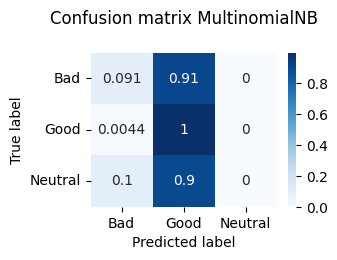

                  Resultados Clasificador: DummyStratified
              precision    recall  f1-score   support

         Bad       0.30      0.28      0.29       121
        Good       0.57      0.61      0.59       225
     Neutral       0.07      0.05      0.06        40

    accuracy                           0.45       386
   macro avg       0.31      0.31      0.31       386
weighted avg       0.43      0.45      0.44       386



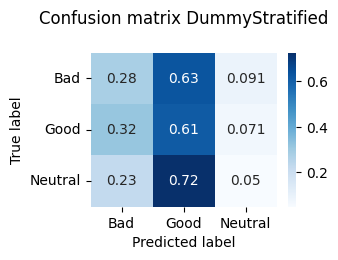

In [54]:
test_classifier(lista_pipelines)

```
Escriba aquí su justificación
```

No conformes con el rendimiento obtenido en la sección 1.2, el cuerpo docente les pide que realicen un **`HalvingGridSearchCV`** con diferentes parámetros para mejorar el rendimiento de la clasificación. Para esto, se le solicita que defina:

- Tres clasificadores distintos en donde varie sus parámetros. Considere usar modelos clásicos como también los basados en ensamblaje.
- Modificar `n-gram` range del `CountVectorizer` probando `(1,1), (1,2) y (1,3)`. Examinar también los otros parámetros de CountVectorizer como por ejemplo `max_df`, `min_df`, etc... ([Documentación aquí](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html))
- Seleccionar las columnas que contribuyen con la mayor información para la clasificación con `SelectPercentile` en los percentiles `[20, 40, 60, 80]` (puede usar la métrica que usted quiera).
- Reporte la mejor combinación encontrada y justifique por qué cree que es la mejor según el clasificador usado, la cantidad de columnas seleccionadas y los parámetros de CountVectorizer seleccionados por GridSearch.

A continuación, un ejemplo de parametros para GridSearch para una búsqueda de 3 clasificadores distintos:

```python
params = [
       # clasificador 1 + hiperparámetros
       {'clf': classificator1(),
        'clf__penalty': ['ovr'],
       # clasificador 1 + hiperparámetros    
       {'clf': classificator2(),
        'clf__n_estimators': [200]},
       # clasificador 1 + hiperparámetros
       {'clf': classificator3(),
        ...
       }
       ]
```

**Nota 1**: Puede ver los parámetros modificables aplicando el método get_params() sobre su pipeline. Ver la clase de GridSearch para mayor información sobre la sintáxis de las grillas.

**Nota 2**: Recuerde inicializar los clasificadores con un random state definido.

**Nota 3**: Puede usar en `HalvingGridSearchCV` el parámetro `verbose=10` para ver que GridSearch le indique el estado de su ejecución.

**Nota 3:** El GridSearch puede tomar tiempos de búsqueda exorbitantes, por lo que se le recomienda no agrandar mucho el espacio de búsqueda, dejar corriendo el código y tomarse un tecito.

**Respuesta:**

In [55]:
#### Código aquí ####
from sklearn.neighbors import KNeighborsClassifier

transformaciones_grid = [('escalar', MinMaxScaler(), atributos_de_interes),
                    ('BagofWords', CountVectorizer(tokenizer= StemmerTokenizer()), 'history_text')]
column_transformer_grid = ColumnTransformer(transformers = transformaciones_grid)

###MultinomialNB
baseline_MultinomialNB = Pipeline([
    ('column_transformer', column_transformer_grid),
    ('SelectPercentile', SelectPercentile(score_func=f_classif)),
    ('classifier', MultinomialNB())])


grid_params_MultinomialNB = {'column_transformer__BagofWords__ngram_range': [(1, 1), (1, 2), (1, 3)],
                             'column_transformer__BagofWords__max_df': [0.9, 1],
                             'column_transformer__BagofWords__min_df': [0.1, 0.2],
                             'SelectPercentile__percentile': [20, 40, 60, 80],
                             'classifier__alpha': [0.1, 0.5, 1.0]}

### KNeighborsClassifier
baseline_KNeighborsClassifier = Pipeline([
    ('column_transformer', column_transformer_grid),
    ('SelectPercentile', SelectPercentile(score_func=f_classif)),
    ('classifier', KNeighborsClassifier())])

grid_params_KNeighborsClassifier = {'column_transformer__BagofWords__ngram_range': [(1, 1), (1, 2), (1, 3)],
                                    'column_transformer__BagofWords__max_df': [ 0.9, 1],
                                    'column_transformer__BagofWords__min_df': [0.1, 0.2],
                                    'SelectPercentile__percentile': [20, 40, 60, 80],
                                    'classifier__n_neighbors': [3, 5, 7],
                                    'classifier__weights': ['uniform', 'distance']}


### SVC
baseline_SVC = Pipeline([
    ('column_transformer', column_transformer_grid),
    ('SelectPercentile', SelectPercentile(score_func=f_classif)),
    ('classifier', SVC(random_state=0))])

grid_params_SVC = {'column_transformer__BagofWords__ngram_range': [(1, 1), (1, 2), (1, 3)],
                   'column_transformer__BagofWords__max_df': [ 0.9, 1],
                   'column_transformer__BagofWords__min_df': [0.1, 0.2],
                   'SelectPercentile__percentile': [20, 40, 60, 80],
                   'classifier__C': [1.0, 10.0],
                   'classifier__kernel': ['linear', 'rbf'],
                   'classifier__class_weight': [None, 'balanced']}

### RandomForestClassifier
baseline_RF = Pipeline([
    ('column_transformer', column_transformer_grid),
    ('SelectPercentile', SelectPercentile(score_func=f_classif)),
    ('classifier', RandomForestClassifier(random_state=0))])

grid_params_RF = {'column_transformer__BagofWords__ngram_range': [(1, 1), (1, 2), (1, 3)],
                   'column_transformer__BagofWords__max_df': [ 0.9, 1],
                   'column_transformer__BagofWords__min_df': [0.1, 0.2],
                   'SelectPercentile__percentile': [20, 40, 60, 80],
                   'classifier__n_estimators': [100, 200, 300],
                   'classifier__max_depth': [5, 8, 10],
                   'classifier__class_weight': [None, 'balanced']}

In [56]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import time
lista_baselines = [(baseline_MultinomialNB, grid_params_MultinomialNB, 'MultinomialNB'),
                   (baseline_KNeighborsClassifier, grid_params_KNeighborsClassifier, 'KNeighborsClassifier'),
                   (baseline_SVC, grid_params_SVC, 'SVC'),
                   (baseline_RF, grid_params_RF, 'RandomForestClassifier')]

def obtener_hiperparametros(lista_baselines,df=df_comics):
    t_inicial = time.time()
    params = []
    X_train, X_test, y_train, y_test = train_test_split(df, df['alignment'], test_size=0.3, random_state=0)
    for base, grid, name in lista_baselines:
        time_i = time.time()
        print('================'*5)
        print(f'                           {name}                           ')
        print('================'*5)
        halving_cv = HalvingGridSearchCV(base, grid, cv=3, n_jobs=-1, random_state=0)
        halving_cv.fit(X_train, y_train)
        best_params = halving_cv.best_params_
        best_score = halving_cv.best_score_
        best_model = halving_cv.best_estimator_
        
        print(f"Best Parameters: {best_params}")
        print(f"Best Score: {best_score}")
        predictions = best_model.predict(X_test)
        cm = confusion_matrix(y_test, predictions, normalize='true')
        classes = unique_labels(df['alignment'])
        print("\033[1m=============\033[0m"*7)
        print('                  '+f'\033[1mResultados Clasificador: {name}\033[0m')
        print("\033[1m=============\033[0m"*7)
        print(classification_report(y_test, predictions))
        df_confusion = pd.DataFrame(cm, index=classes, columns=classes)
        plt.figure(figsize=(3, 2))
        g = sns.heatmap(df_confusion, annot=True, cmap="Blues")
        g.set_yticklabels(g.get_yticklabels(), rotation=0)
        plt.title(f'Confusion matrix {name}\n')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.autoscale()
        plt.show()
        tiempo_ejecución = time.time() - time_i
        print(f'Tiempo de ejecución {round(tiempo_ejecución,2)} segundos. [{name}]')
        params += [best_params]
    print(f'Tiempo Total de ejecución {round(time.time()-t_inicial,2)} segundos.')
    return params


                           MultinomialNB                           


c:\Users\mvarasg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


216 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mvarasg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mvarasg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mvarasg\AppDa

Best Parameters: {'SelectPercentile__percentile': 60, 'classifier__alpha': 0.1, 'column_transformer__BagofWords__max_df': 0.9, 'column_transformer__BagofWords__min_df': 0.1, 'column_transformer__BagofWords__ngram_range': (1, 2)}
Best Score: 0.5650001278020601
                  Resultados Clasificador: MultinomialNB
              precision    recall  f1-score   support

         Bad       0.36      0.63      0.46       121
        Good       0.71      0.50      0.59       225
     Neutral       0.23      0.07      0.11        40

    accuracy                           0.50       386
   macro avg       0.43      0.40      0.39       386
weighted avg       0.55      0.50      0.50       386



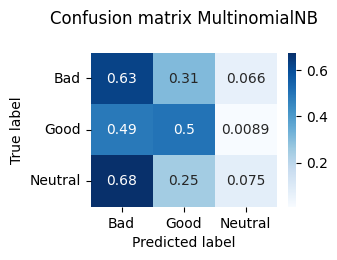

Tiempo de ejecución 110.04 segundos. [MultinomialNB]
                           KNeighborsClassifier                           


c:\Users\mvarasg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


432 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mvarasg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mvarasg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mvarasg\AppDa

Best Parameters: {'SelectPercentile__percentile': 80, 'classifier__n_neighbors': 7, 'classifier__weights': 'distance', 'column_transformer__BagofWords__max_df': 0.9, 'column_transformer__BagofWords__min_df': 0.2, 'column_transformer__BagofWords__ngram_range': (1, 2)}
Best Score: 0.5587633872658028
                  Resultados Clasificador: KNeighborsClassifier
              precision    recall  f1-score   support

         Bad       0.42      0.40      0.41       121
        Good       0.63      0.76      0.69       225
     Neutral       0.00      0.00      0.00        40

    accuracy                           0.56       386
   macro avg       0.35      0.38      0.37       386
weighted avg       0.50      0.56      0.53       386



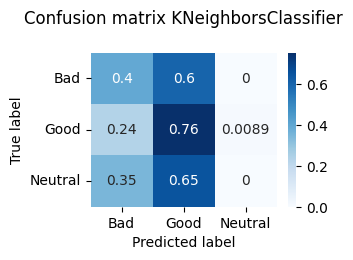

Tiempo de ejecución 185.51 segundos. [KNeighborsClassifier]
                           SVC                           


c:\Users\mvarasg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


576 fits failed out of a total of 1152.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
576 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mvarasg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mvarasg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mvarasg\AppD

Best Parameters: {'SelectPercentile__percentile': 60, 'classifier__C': 10.0, 'classifier__class_weight': None, 'classifier__kernel': 'rbf', 'column_transformer__BagofWords__max_df': 0.9, 'column_transformer__BagofWords__min_df': 0.1, 'column_transformer__BagofWords__ngram_range': (1, 1)}
Best Score: 0.5937811517521663
                  Resultados Clasificador: SVC
              precision    recall  f1-score   support

         Bad       0.48      0.40      0.44       121
        Good       0.65      0.81      0.72       225
     Neutral       0.00      0.00      0.00        40

    accuracy                           0.60       386
   macro avg       0.38      0.40      0.39       386
weighted avg       0.53      0.60      0.56       386



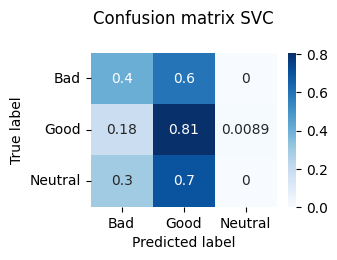

Tiempo de ejecución 242.59 segundos. [SVC]
                           RandomForestClassifier                           


c:\Users\mvarasg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


1296 fits failed out of a total of 2592.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1296 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mvarasg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mvarasg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\mvarasg\Ap

Best Parameters: {'SelectPercentile__percentile': 20, 'classifier__class_weight': None, 'classifier__max_depth': 10, 'classifier__n_estimators': 300, 'column_transformer__BagofWords__max_df': 0.9, 'column_transformer__BagofWords__min_df': 0.1, 'column_transformer__BagofWords__ngram_range': (1, 1)}
Best Score: 0.5917618792014927
                  Resultados Clasificador: RandomForestClassifier
              precision    recall  f1-score   support

         Bad       0.38      0.21      0.28       121
        Good       0.61      0.87      0.72       225
     Neutral       0.00      0.00      0.00        40

    accuracy                           0.57       386
   macro avg       0.33      0.36      0.33       386
weighted avg       0.48      0.57      0.50       386



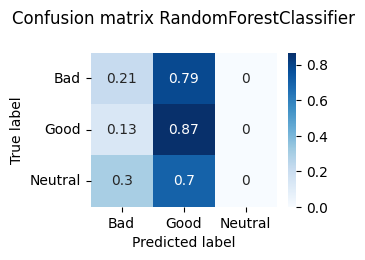

Tiempo de ejecución 642.02 segundos. [RandomForestClassifier]
Tiempo Total de ejecución 1180.16 segundos.


[{'SelectPercentile__percentile': 60,
  'classifier__alpha': 0.1,
  'column_transformer__BagofWords__max_df': 0.9,
  'column_transformer__BagofWords__min_df': 0.1,
  'column_transformer__BagofWords__ngram_range': (1, 2)},
 {'SelectPercentile__percentile': 80,
  'classifier__n_neighbors': 7,
  'classifier__weights': 'distance',
  'column_transformer__BagofWords__max_df': 0.9,
  'column_transformer__BagofWords__min_df': 0.2,
  'column_transformer__BagofWords__ngram_range': (1, 2)},
 {'SelectPercentile__percentile': 60,
  'classifier__C': 10.0,
  'classifier__class_weight': None,
  'classifier__kernel': 'rbf',
  'column_transformer__BagofWords__max_df': 0.9,
  'column_transformer__BagofWords__min_df': 0.1,
  'column_transformer__BagofWords__ngram_range': (1, 1)},
 {'SelectPercentile__percentile': 20,
  'classifier__class_weight': None,
  'classifier__max_depth': 10,
  'classifier__n_estimators': 300,
  'column_transformer__BagofWords__max_df': 0.9,
  'column_transformer__BagofWords__min_d

In [57]:
clfs = obtener_hiperparametros(lista_baselines)
clfs

In [58]:
best_params = [{'SelectPercentile__percentile': 60,
  'classifier__alpha': 0.1,
  'column_transformer__BagofWords__max_df': 0.9,
  'column_transformer__BagofWords__min_df': 0.1,
  'column_transformer__BagofWords__ngram_range': (1, 3)},
 {'SelectPercentile__percentile': 80,
  'classifier__n_neighbors': 7,
  'classifier__weights': 'distance',
  'column_transformer__BagofWords__max_df': 0.9,
  'column_transformer__BagofWords__min_df': 0.1,
  'column_transformer__BagofWords__ngram_range': (1, 1)},
 {'SelectPercentile__percentile': 40,
  'classifier__C': 10.0,
  'classifier__kernel': 'rbf',
  'column_transformer__BagofWords__max_df': 0.9,
  'column_transformer__BagofWords__min_df': 0.1,
  'column_transformer__BagofWords__ngram_range': (1, 3)},
 {'SelectPercentile__percentile': 80,
  'classifier__max_depth': 10,
  'classifier__n_estimators': 200,
  'column_transformer__BagofWords__max_df': 0.9,
  'column_transformer__BagofWords__min_df': 0.1,
  'column_transformer__BagofWords__ngram_range': (1, 3)}]

```
Escriba aquí su justificación
```

## 1.4 Predicción del datos sin etiquetado  [0.5 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/DolotxUUYAAbg7f.jpg" width="350">
</p>


LLego el momento de predecir 
`Vergil`, `Gorilla Girl` y `Batcow`


**Nota:** Recuerde que pueden existir campos vacios en `history_text`, por lo que se les recomienda borrar los nan.

**Respuesta:**

In [59]:
df_comics_no_label = df_comics_no_label.dropna(subset=['history_text']) # eliminar ejemplos sin historia
df_comics_no_label

,Unnamed: 0,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,17,A'dal,NaN,NaN,7,"As with most of the naaru, little is known of ...",NaN,85,30,70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27,Agent Zero (FOX),David North,NaN,6,"During mid-late 1973, Zero was a member of Tea...",Zero can absorb kinetic energy to further incr...,90,10,25,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,31,Ajax (FOX),Francis,Francis Freeman,7,Ajax (born Francis Freeman) was a human who ga...,Ajax has claimed that the procedure to obtain ...,85,25,45,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
6,46,A.M.A.Z.O. (CW),NaN,NaN,22,The Anti Meta-human Adaptive Zootomic Organism...,"With its metallic body, it easily overpowered ...",90,100,100,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1368,Vergil,Vergil Sparda,NaN,16,"Vergil, later also known as Nelo Angelo, is on...",NaN,90,75,95,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
80,1396,Wendigo,Wendigo,NaN,6,The Wendigo are the result of an ancient curse...,NaN,65,80,75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
81,1431,XS (CW),Nora West-Allen,NaN,19,"According to Eobard Thawne, the daughter of Ba...",Nora possesses a natural connection to the Spe...,90,55,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
82,1440,Yondu (MCU),Yondu,NaN,7,"Yondu Udonta was a Centaurian, leader of a key...","Yondu Udonta was a member of the Centaurians, ...",85,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se procede a hacer reducción de dimensionalidad con TSNE:

In [60]:
from sklearn.manifold import TSNE
#Se define el pipeline que hace el column transformer y también la reducción de dimensionalidad.
pipeline_tsne = Pipeline([
    ('column_transformer', column_transformer),
    ('tsne', TSNE(n_components=2, random_state=0, init='random'))
])

Se procede a aplicar el tsne:

In [61]:
data_tsne = pipeline_tsne.fit_transform(df_comics_no_label)
data_tsne = pd.DataFrame(data_tsne, columns=['Componente 1', 'Componente 2'])

Se grafica:

In [62]:
#Se grafica
fig = px.scatter(data_tsne, x='Componente 1', y='Componente 2')
fig.show()

Ahora se procede a realizar clustering con KMeans:

In [63]:
from sklearn.cluster import KMeans
baseline_kmeans = Pipeline([
    ('column_transformer', column_transformer),
    ('K-means', KMeans(n_clusters=3, random_state=0, n_init= 'auto'))])

In [64]:
transformed_data_4 = baseline_kmeans.fit_transform(df_comics_no_label)
cluster_labels = baseline_kmeans.named_steps['K-means'].labels_
cluster_centers = baseline_kmeans.named_steps['K-means'].cluster_centers_

In [65]:
data_tsne['cluster_labels'] = cluster_labels

In [66]:
fig = px.scatter(data_tsne, x='Componente 1', y='Componente 2', color = cluster_labels)
fig.show()

In [67]:
df_comics_no_label['cluster_labels'] = cluster_labels
df_comics_no_label['cluster_labels'].value_counts()

cluster_labels
0    74
2     1
1     1
Name: count, dtype: int64

In [68]:
df_comics_no_label[df_comics_no_label['name'].isin(['Vergil', 'Gorilla Girl', 'Batcow'])]

,Unnamed: 0,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,...,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength,cluster_labels
16,122,Batcow,NaN,NaN,3,Bat-Cow was originally a cow that was found by...,NaN,70,10,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
40,529,Gorilla Girl,Fahnbullah Eddy,Fahnbullah Eddy,7,A carnival performer with the ability to turn ...,Gorilla Girl can transform into a talking gori...,90,35,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
78,1368,Vergil,Vergil Sparda,NaN,16,"Vergil, later also known as Nelo Angelo, is on...",NaN,90,75,95,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
83,122,Batcow,NaN,NaN,3,Bat-Cow was originally a cow that was found by...,NaN,70,10,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


<p align="center">
  <img src="https://media1.tenor.com/images/fb5bf7cc5a4acb91b4177672886a88ba/tenor.gif?itemid=5591338">
</p>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>